In [ ]:
import pandas as pd
import numpy as np
import time,datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [ ]:
data = pd.read_csv("rideshare_kaggle.csv", on_bad_lines="skip")


In [ ]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09


In [ ]:
extra_cols = [ 'apparentTemperature', 'precipIntensity' ,
'humidity',
'windSpeed',
'apparentTemperatureHigh',
'dewPoint',
'precipIntensityMax',
'apparentTemperatureMax',
'cloudCover',
'moonPhase',
'windGustTime',
'visibility',
'temperatureHighTime' ,
'apparentTemperatureHighTime',
'apparentTemperatureLow' ,
'apparentTemperatureLowTime',
'temperatureMinTime' ,
'temperatureMaxTime',
'apparentTemperatureMin',
'apparentTemperatureMinTime', 'apparentTemperatureMaxTime',
'windBearing' ,
'sunriseTime',
'uvIndex' ,
'visibility.1',
'ozone',
'sunsetTime', 'uvIndexTime']
data = data.drop(extra_cols, axis = 1)

In [ ]:
print(data.isnull().sum())
print(data.isnull().sum().sum())
data=data.dropna()

id                       0
timestamp                0
hour                     0
day                      0
month                    0
datetime                 0
timezone                 0
source                   0
destination              0
cab_type                 0
product_id               0
name                     0
price                 2941
distance                 0
surge_multiplier         0
latitude                 0
longitude                0
temperature              0
short_summary            0
long_summary             0
precipProbability        0
windGust                 0
temperatureHigh          0
temperatureLow           1
temperatureLowTime       1
icon                     1
pressure                 1
temperatureMin           1
temperatureMax           1
dtype: int64
2947


Text(0.5, 1.0, 'Number of trips Vs hours')

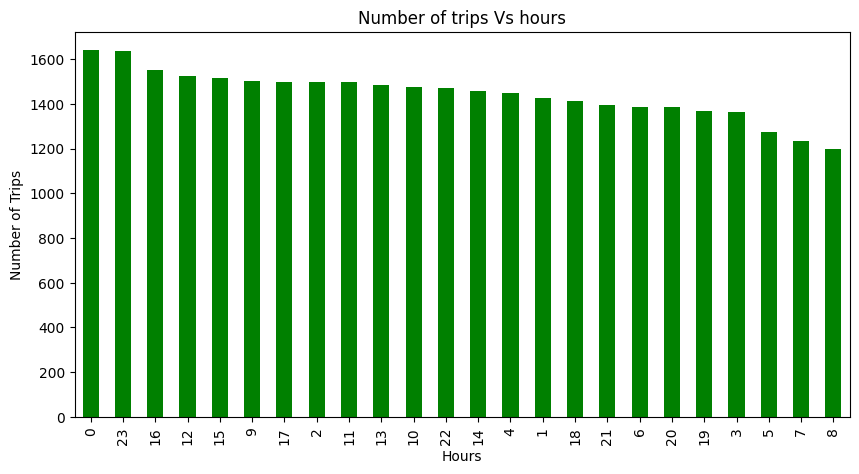

In [ ]:
hours = data['hour'].value_counts()
hours.plot(kind= 'bar', color= 'green', figsize= (10,5))
plt.xlabel( 'Hours' )
plt.ylabel( 'Number of Trips' )
plt.title( 'Number of trips Vs hours')

In [ ]:
day_week = [calendar.day_name[x.dayofweek] for x in
            pd.to_datetime(data['datetime'], format="%Y-%m-%d %H:%M:%S")]
day_week = pd.Series(day_week)


Text(0.5, 1.0, 'Number of trips Vs days')

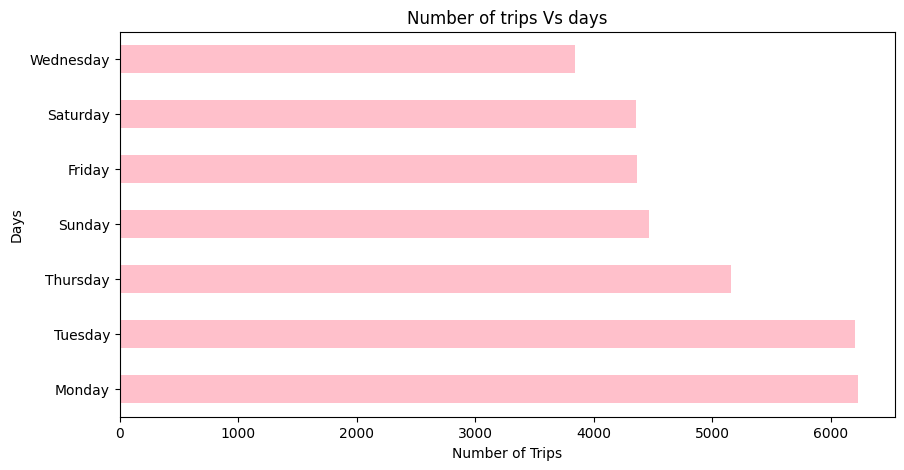

In [ ]:
days = day_week.value_counts()
days.plot(kind='barh', color= 'pink', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Days' )
plt.title( 'Number of trips Vs days')

Text(0.5, 1.0, 'Number of trips Vs Months')

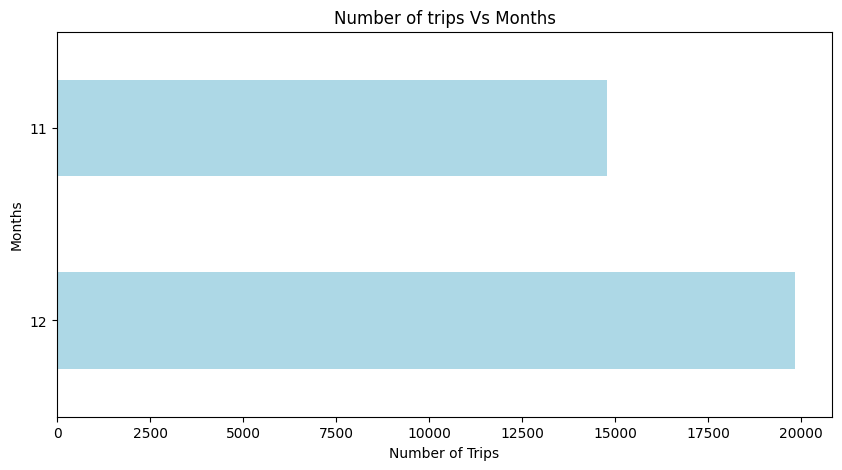

In [ ]:
months = data[ 'month' ].value_counts()
months.plot(kind='barh', color= 'lightblue', figsize=(10, 5) )
plt.xlabel('Number of Trips')
plt.ylabel('Months' )
plt.title( 'Number of trips Vs Months')

Text(0.5, 1.0, 'Number of trips Vs days of december')

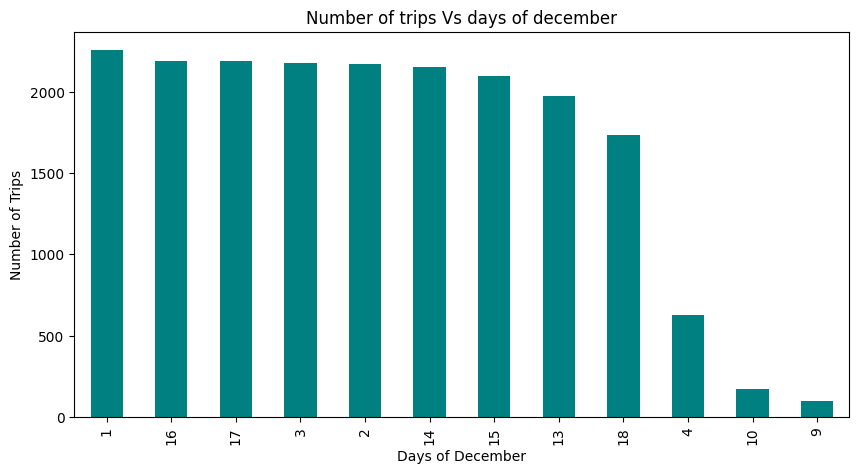

In [ ]:
months = data[ 'day' ][data['month']==12].value_counts()
months.plot(kind='bar', color= 'teal', figsize=(10, 5) )
plt.xlabel('Days of December')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of december')

Text(0.5, 1.0, 'Number of Trips by Pickup points')

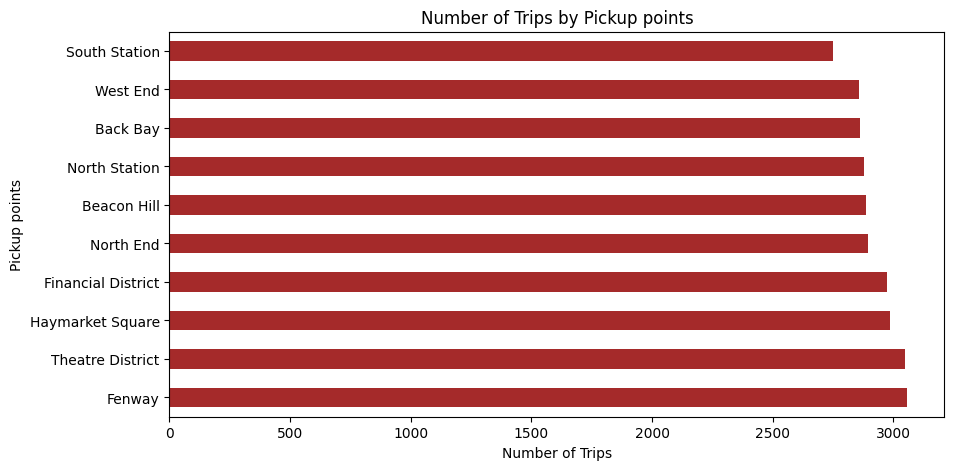

In [ ]:
pic_point = data[ 'source' ].value_counts().nlargest(10)
pic_point.plot(kind='barh', color= 'brown', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Pickup points' )
plt.title( 'Number of Trips by Pickup points')

Text(0.5, 1.0, 'Number of Trips by Drop points')

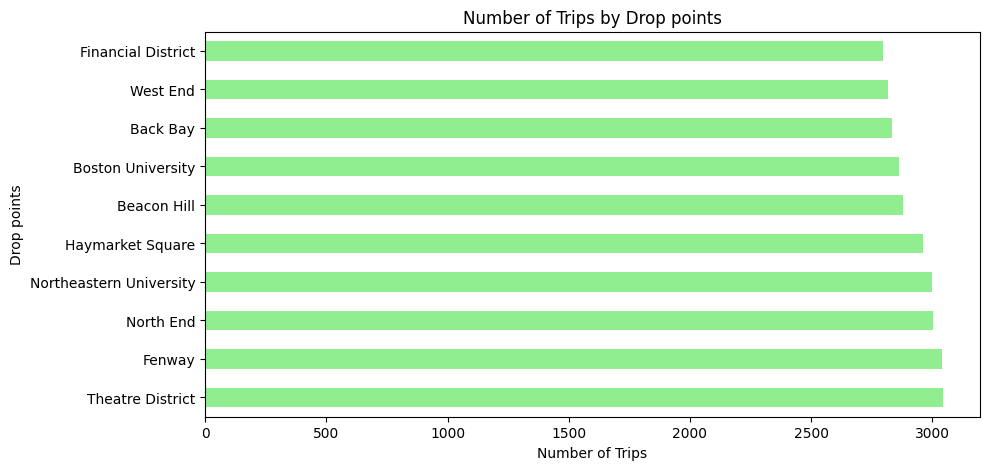

In [ ]:
drop_point = data[ 'destination' ].value_counts().nlargest(10)
drop_point.plot(kind='barh', color= 'lightgreen', figsize=(10, 5))
plt.xlabel('Number of Trips')
plt.ylabel('Drop points' )
plt.title( 'Number of Trips by Drop points')

Text(0.5, 1.0, 'points - points Trips Counts')

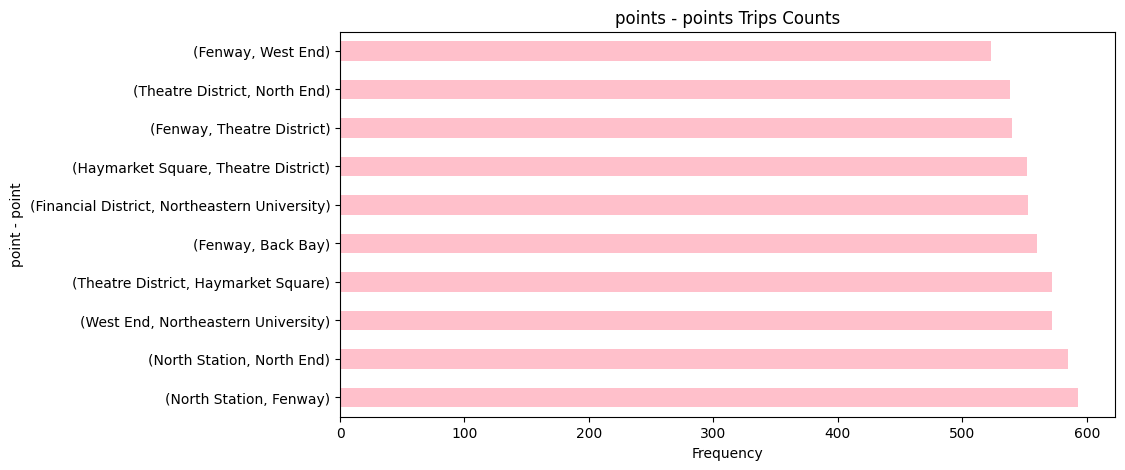

In [ ]:
p_p = data[[ 'source', 'destination'] ].value_counts().nlargest(10)
p_p.plot(kind='barh', color= 'pink', figsize=(10, 5))
plt.xlabel('Frequency')
plt.ylabel('point - point' )
plt.title( 'points - points Trips Counts')

Text(0.5, 1.0, 'Number of Trips by Cabs Name ')

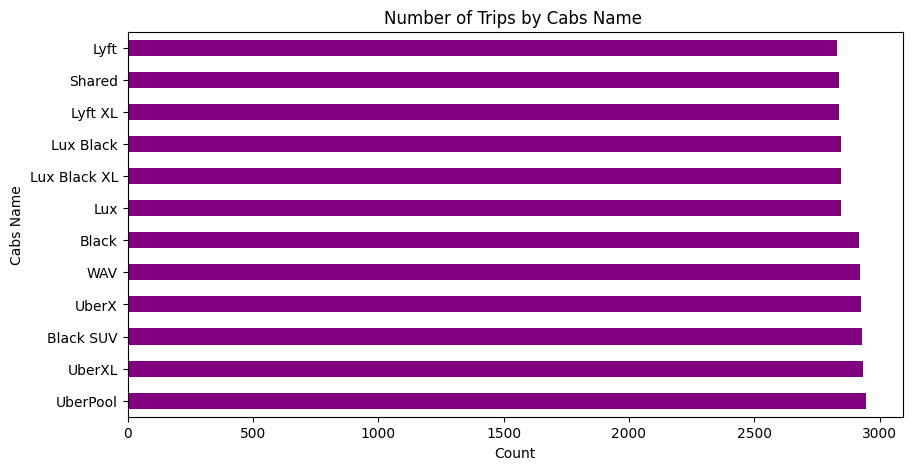

In [ ]:
cabs = data['name'].value_counts()
cabs.plot(kind='barh',color='purple',figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('Cabs Name' )
plt.title( 'Number of Trips by Cabs Name ')

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
data['id'] = label_encoder.fit_transform(data['id'])
data['datetime'] = label_encoder.fit_transform(data['datetime'])
data['timezone'] = label_encoder.fit_transform(data['timezone'])
data['destination'] = label_encoder.fit_transform(data['destination'])
data['product_id'] = label_encoder.fit_transform(data['product_id'])
data['short_summary'] = label_encoder.fit_transform(data['short_summary'])
data['long_summary'] = label_encoder.fit_transform(data['long_summary'])
data['name'] = label_encoder.fit_transform(data['name'])

In [ ]:
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
UberPool --> 8
UberX --> 9
UberXL --> 10
WAV --> 11


In [ ]:
data['source'] = label_encoder.fit_transform(data['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [ ]:
data['icon'] = label_encoder.fit_transform(data['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [ ]:
data['cab_type'] = label_encoder.fit_transform(data['cab_type'])

print("Class mapping of Cabe_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Cabe_type: 
Lyft --> 0
Uber --> 1


In [ ]:
x = data[data['cab_type']==1].drop(['price', 'cab_type'], axis=1)
y = data[data['cab_type']==1]['price']

In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [ ]:
from   sklearn.feature_selection   import   RFE
from   sklearn.linear_model   import   LinearRegression
from   sklearn.tree   import   DecisionTreeRegressor
from   sklearn.ensemble   import   RandomForestRegressor


from   sklearn   import  ensemble
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def train_test_models(x_train, y_train, x_test, y_test):
    print("Linear Regression... ")
    lr_model = LinearRegression()
    lr_model = lr_model.fit(x_train,  y_train)
    print(lr_model.score(x_test,  y_test))


    print("Decision Tree... ")
    dt_model = DecisionTreeRegressor(random_state = 0, max_depth = 10)
    dt_model.fit(x_train,  y_train)
    print(dt_model.score(x_test,  y_test))


    print("Random Forest... ")
    rf_model = RandomForestRegressor(n_estimators = 20, random_state = 0)
    rf_model.fit(x_train,  y_train)
    print(rf_model.score(x_test,  y_test))

    return [lr_model, dt_model, rf_model]

In [ ]:
def feature_eliminate(trained_model, x, y, n_features=40):
    rfe = RFE(trained_model, n_features_to_select=n_features)
    rfe = rfe.fit(x, y)
    x_new = x[x.columns[rfe.support_]]
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)
    new_fit = trained_model.fit(x_train, y_train)
    print(new_fit.score(x_test, y_test))

In [ ]:
train_test_models(x_train, y_train, x_test, y_test)

Linear Regression... 
0.6416823553754778
Decision Tree... 
0.9147815129022793
Random Forest... 
0.936529708097156


[LinearRegression(),
 DecisionTreeRegressor(max_depth=10, random_state=0),
 RandomForestRegressor(n_estimators=20, random_state=0)]

In [ ]:
dt_model = DecisionTreeRegressor(random_state=0, max_depth=10)
dt_model.fit(x_train, y_train)

# Make predictions
y_pred = dt_model.predict(x_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 6.05
Mean Absolute Error: 1.38
R^2 Score: 0.91


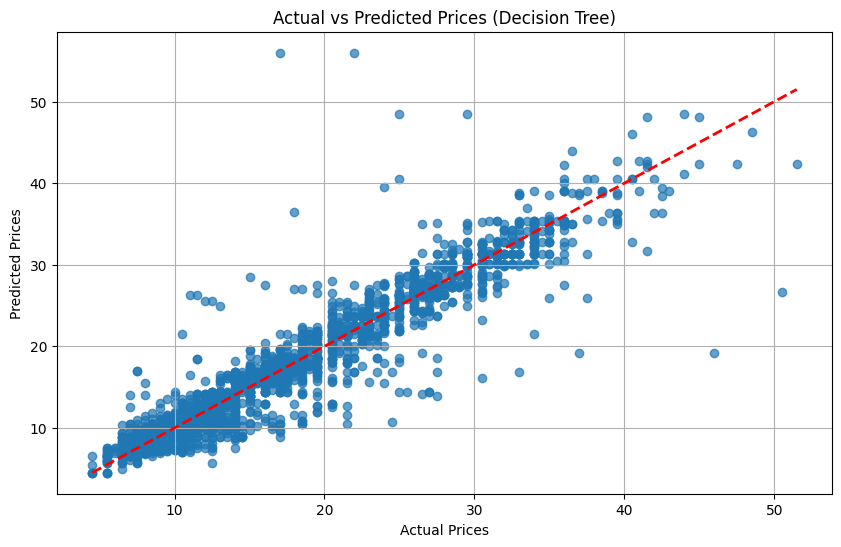

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices (Decision Tree)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()


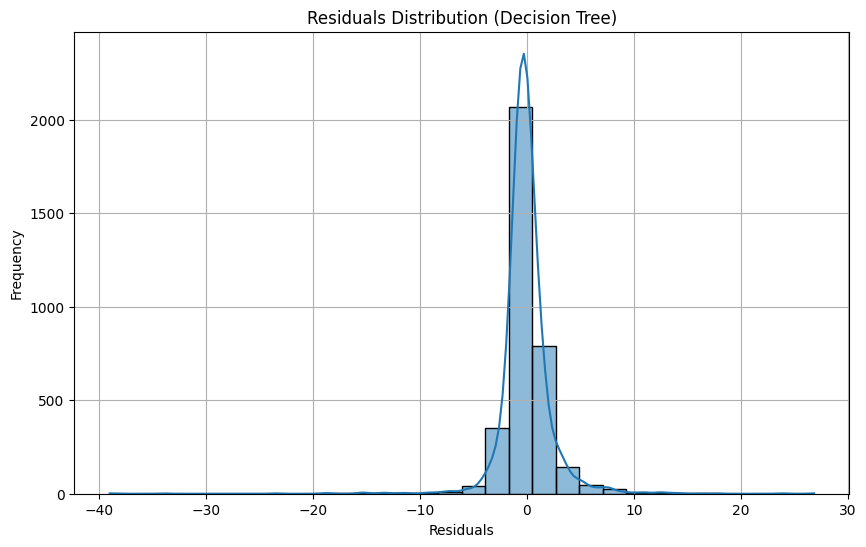

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution (Decision Tree)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [ ]:
threshold = 5
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df['Difference'] = predictions_df['Actual'] - predictions_df['Predicted']
predictions_df['Correct'] = np.where(predictions_df['Difference'].abs() <= threshold, 'TP/TN', 'FP/FN')

# Count TP, TN, FP, FN
TP = np.sum((predictions_df['Difference'] <= threshold) & (predictions_df['Difference'] >= -threshold))
TN = 0  # In this regression context, TN is usually not defined
FP = np.sum(predictions_df['Difference'] > threshold)
FN = np.sum(predictions_df['Difference'] < -threshold)

# Create a DataFrame for TP, TN, FP, FN
confusion_counts = pd.Series({'True Positives': TP, 'True Negatives': TN, 'False Positives': FP, 'False Negatives': FN})


<ipython-input-31-f2300b34ba92>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=confusion_counts.index, y=confusion_counts.values, palette='viridis')


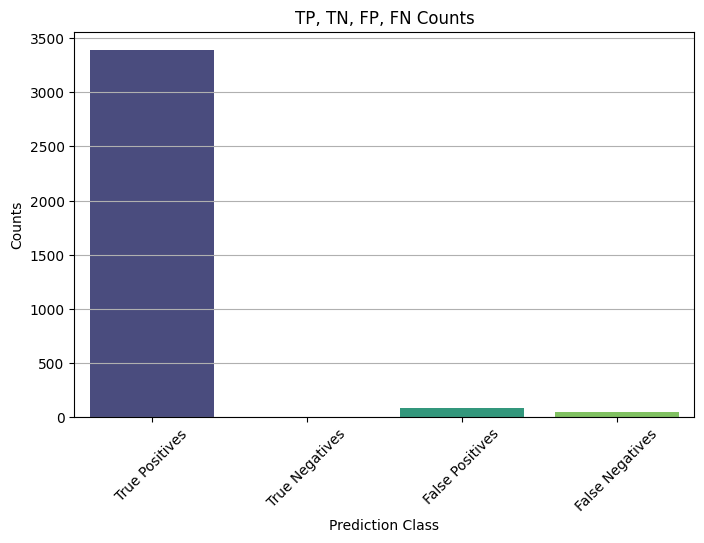

In [ ]:
# Plot TP, TN, FP, FN
plt.figure(figsize=(8, 5))
sns.barplot(x=confusion_counts.index, y=confusion_counts.values, palette='viridis')
plt.title('TP, TN, FP, FN Counts')
plt.ylabel('Counts')
plt.xlabel('Prediction Class')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


source_mapping = {name: idx for idx, name in enumerate(data['source'].unique())}
destination_mapping = {name: idx for idx, name in enumerate(data['destination'].unique())}
cab_type_mapping = {name: idx for idx, name in enumerate(data['cab_type'].unique())}

# Convert categorical columns to numeric using the mapping
data['source'] = data['source'].map(source_mapping)
data['destination'] = data['destination'].map(destination_mapping)
data['cab_type'] = data['cab_type'].map(cab_type_mapping)

# Prepare features and target
x = data.drop(['price'], axis=1)  # Adjust to drop appropriate features
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestRegressor(n_estimators=20, random_state=0)
rf_model.fit(x_train, y_train)



RandomForestRegressor(n_estimators=20, random_state=0)

Gradient Boosting Regressor...
Mean Squared Error (Gradient Boosting): 3.29
Mean Absolute Error (Gradient Boosting): 1.22
R² Score (Gradient Boosting): 0.96
Accuracy (Gradient Boosting): 90.98%


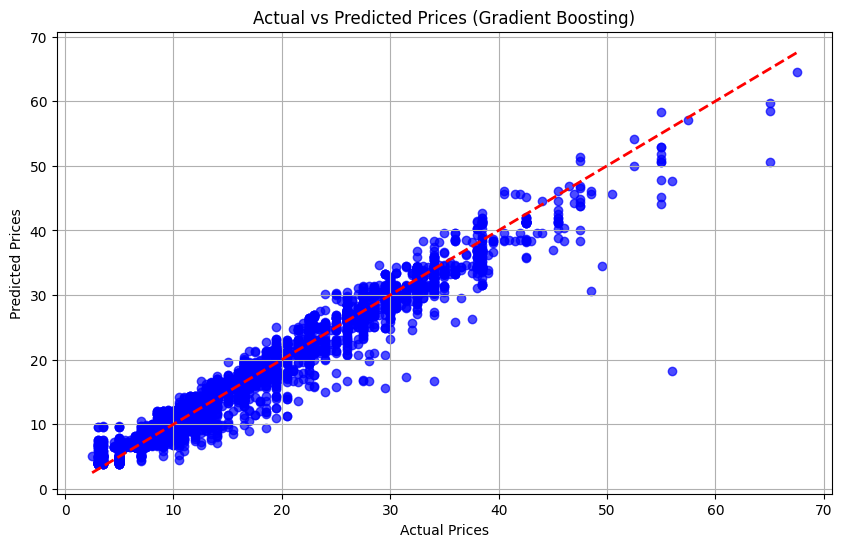

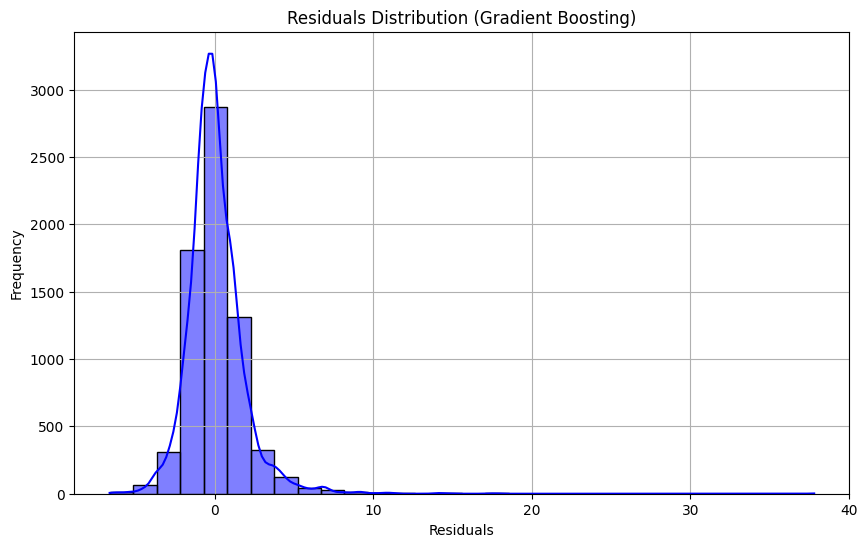

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Train Gradient Boosting Regressor
print("Gradient Boosting Regressor...")
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=0, learning_rate=0.1, max_depth=3)
gbr_model.fit(x_train, y_train)

# Evaluate the model
y_pred_gbr = gbr_model.predict(x_test)

# Calculate performance metrics
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
mape_gbr = mean_absolute_percentage_error(y_test, y_pred_gbr)  # Mean Absolute Percentage Error
accuracy_gbr = 100 - (mape_gbr * 100)  # Accuracy as a percentage

# Print metrics
print(f'Mean Squared Error (Gradient Boosting): {mse_gbr:.2f}')
print(f'Mean Absolute Error (Gradient Boosting): {mae_gbr:.2f}')
print(f'R² Score (Gradient Boosting): {r2_gbr:.2f}')
print(f'Accuracy (Gradient Boosting): {accuracy_gbr:.2f}%')

# Plot Actual vs Predicted Prices for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices (Gradient Boosting)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()

# Residuals Distribution for Gradient Boosting
residuals_gbr = y_test - y_pred_gbr
plt.figure(figsize=(10, 6))
sns.histplot(residuals_gbr, bins=30, kde=True, color='blue')
plt.title('Residuals Distribution (Gradient Boosting)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error

# Train SVR
print("Support Vector Regression...")
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_model.fit(x_train, y_train)

# Evaluate the model
y_pred_svr = svr_model.predict(x_test)

# Metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)  # Mean Absolute Percentage Error
accuracy_svr = 100 - (mape_svr * 100)  # Accuracy as a percentage

# Print metrics
print(f'Mean Squared Error (SVR): {mse_svr:.2f}')
print(f'Mean Absolute Error (SVR): {mae_svr:.2f}')
print(f'R² Score (SVR): {r2_svr:.2f}')
print(f'Accuracy (SVR): {accuracy_svr:.2f}%')


Support Vector Regression...
Mean Squared Error (SVR): 93.10
Mean Absolute Error (SVR): 7.32
R² Score (SVR): -0.10
Accuracy (SVR): 49.29%


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Train KNN Regressor
print("KNN Regression...")
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Evaluate the model
y_pred_knn = knn_model.predict(x_test)

# Metrics
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)  # Mean Absolute Percentage Error
accuracy_knn = 100 - (mape_knn * 100)  # Accuracy as a percentage

# Print metrics
print(f'Mean Squared Error (KNN): {mse_knn:.2f}')
print(f'Mean Absolute Error (KNN): {mae_knn:.2f}')
print(f'R^2 Score (KNN): {r2_knn:.2f}')
print(f'Accuracy (KNN): {accuracy_knn:.2f}%')


KNN Regression...
Mean Squared Error (KNN): 102.55
Mean Absolute Error (KNN): 8.13
R^2 Score (KNN): -0.21
Accuracy (KNN): 33.73%


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Train XGBoost Regressor
print("XGBoost Regression...")
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
xgb_model.fit(x_train, y_train)

# Evaluate the model
y_pred_xgb = xgb_model.predict(x_test)

# Metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)  # Mean Absolute Percentage Error
accuracy_xgb = 100 - (mape_xgb * 100)  # Accuracy as a percentage

# Print metrics
print(f'Mean Squared Error (XGBoost): {mse_xgb:.2f}')
print(f'Mean Absolute Error (XGBoost): {mae_xgb:.2f}')
print(f'R^2 Score (XGBoost): {r2_xgb:.2f}')
print(f'Accuracy (XGBoost): {accuracy_xgb:.2f}%')


XGBoost Regression...
Mean Squared Error (XGBoost): 3.28
Mean Absolute Error (XGBoost): 1.22
R^2 Score (XGBoost): 0.96
Accuracy (XGBoost): 90.96%


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_percentage_error

# Train ElasticNet Regressor
print("ElasticNet Regression...")
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=0)
elastic_model.fit(x_train, y_train)

# Evaluate the model
y_pred_elastic = elastic_model.predict(x_test)

# Metrics
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)
mape_elastic = mean_absolute_percentage_error(y_test, y_pred_elastic)  # Mean Absolute Percentage Error
accuracy_elastic = 100 - (mape_elastic * 100)  # Accuracy as a percentage

# Print metrics
print(f'Mean Squared Error (ElasticNet): {mse_elastic:.2f}')
print(f'Mean Absolute Error (ElasticNet): {mae_elastic:.2f}')
print(f'R^2 Score (ElasticNet): {r2_elastic:.2f}')
print(f'Accuracy (ElasticNet): {accuracy_elastic:.2f}%')


ElasticNet Regression...
Mean Squared Error (ElasticNet): 47.23
Mean Absolute Error (ElasticNet): 5.41
R^2 Score (ElasticNet): 0.44
Accuracy (ElasticNet): 57.02%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.503e+05, tolerance: 2.409e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Train CatBoost Regressor
print("CatBoost Regression...")
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0, random_seed=42)
catboost_model.fit(x_train, y_train)

# Evaluate the model
y_pred_cat = catboost_model.predict(x_test)

# Metrics
mse_cat = mean_squared_error(y_test, y_pred_cat)
mae_cat = mean_absolute_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)
mape_cat = mean_absolute_percentage_error(y_test, y_pred_cat)  # Mean Absolute Percentage Error
accuracy_cat = 100 - (mape_cat * 100)  # Accuracy as a percentage

# Print metrics
print(f'Mean Squared Error (CatBoost): {mse_cat:.2f}')
print(f'Mean Absolute Error (CatBoost): {mae_cat:.2f}')
print(f'R^2 Score (CatBoost): {r2_cat:.2f}')
print(f'Accuracy (CatBoost): {accuracy_cat:.2f}%')


CatBoost Regression...
Mean Squared Error (CatBoost): 2.86
Mean Absolute Error (CatBoost): 1.14
R^2 Score (CatBoost): 0.97
Accuracy (CatBoost): 91.48%
